# PCR İle Modelleme

In [66]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
import joblib

from warnings import filterwarnings
filterwarnings('ignore')

In [36]:
fridge = pd.read_excel('emlak_gercek.xlsx')
df = fridge.copy()
df = df.dropna()
y = df["Fiyat"].astype('int32')
X_ = df.drop(['Fiyat', "Isıtma_Tipi", "Krediye_Uygunluk", "Eşya_Durumu", "Kira_Getirisi"], axis=1).astype('int32')
X = pd.DataFrame(X_)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                   random_state=42)

In [37]:
df["Fiyat"] = df["Fiyat"].astype("float64")

In [38]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 
pca = PCA()

In [39]:
X_reduced_train = pca.fit_transform(scale(X_train))

In [40]:
X_reduced_train[0:1,:]

array([[ 1.46354695, -0.14836488, -1.45249299,  1.47356111, -0.25394413,
        -0.26110028,  0.16182839, -0.05635979]])

In [41]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)[0:5]

array([39.65, 54.65, 67.69, 79.28, 90.01])

In [42]:
lm = LinearRegression()

In [43]:
pcr_model = lm.fit(X_reduced_train, y_train)

In [44]:
pcr_model.intercept_

7176374.634543179

In [45]:
pcr_model.coef_

array([ 2507951.55613254,   572111.69454916, -1855202.4163301 ,
       -1176856.55325372, -3551781.09505235,   672693.33009512,
        9193483.15710699,  6932248.50538517])

In [46]:
y_pred = pcr_model.predict(X_reduced_train)

In [47]:
np.sqrt(mean_squared_error(y_train, y_pred))

4493589.468585711

In [48]:
r2_score(y_train, y_pred)

0.7194904654760312

In [49]:
pca2 = PCA()

In [50]:
X_reduced_test = pca2.fit_transform(scale(X_test))

In [51]:
y_pred = pcr_model.predict(X_reduced_test)

In [52]:
np.sqrt(mean_squared_error(y_test, y_pred))

9116376.997694047

In [53]:
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train[:,0:10], y_train)
y_pred = pcr_model.predict(X_reduced_test[:,0:10])
print(np.sqrt(mean_squared_error(y_test, y_pred)))

9116376.997694047


In [54]:
from sklearn import model_selection

In [55]:
cv_10 = model_selection.KFold(n_splits = 10,
                             shuffle = True,
                             random_state = 1)

In [56]:
lm = LinearRegression()

In [57]:
RMSE = []

In [58]:
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    
    score = np.sqrt(-1*model_selection.cross_val_score(lm, 
                                                       X_reduced_train[:,:i], 
                                                       y_train.ravel(), 
                                                       cv=cv_10, 
                                                       scoring='neg_mean_squared_error').mean())
    RMSE.append(score)

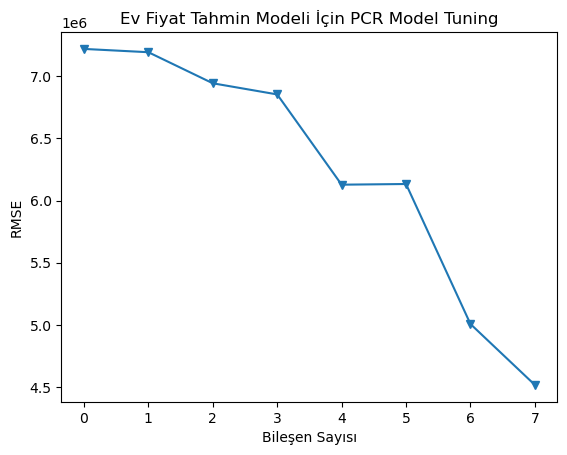

In [59]:
plt.plot(RMSE, '-v')
plt.xlabel('Bileşen Sayısı')
plt.ylabel('RMSE')
plt.title('Ev Fiyat Tahmin Modeli İçin PCR Model Tuning');

In [60]:
pcr_model = lm.fit(X_reduced_train[:,0:6], y_train)

In [61]:
y_pred = pcr_model.predict(X_reduced_train[:,0:6])

In [62]:
print(np.sqrt(mean_squared_error(y_train, y_pred)))

5972667.706387718


In [63]:
y_pred = pcr_model.predict(X_reduced_test[:,0:6])

In [64]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

6018701.808945173


In [68]:
joblib.dump(pcr_model, "pcr_model.sav")

['pcr_model.sav']